# Recommender System Using Sentence Embeddings

### Importing of packages

In [1]:
import pandas as pd
import numpy as np
!pip install tensorflow --quiet
!pip install transformers --quiet
import transformers
import tensorflow as tf


In [2]:
# ratings_df = pd.read_csv('/content/project_user_asset_ratings.csv',encoding='cp1252')
ratings_df = pd.read_csv('project_user_asset_ratings.csv',encoding='cp1252')

In [3]:
#catalog_df = pd.read_csv('/content/CloudTechCatalog.csv',encoding='cp1252')
catalog_df = pd.read_csv('CloudTechCatalog.csv',encoding='cp1252')


In [4]:
ratings_df.head()

,projectId,userId,assetId,assetName,assetDesc,rating
0,10000,3012,126,Azure DevOps for CI/CD Pipeline,Explore how to use Azure DevOps to create and ...,2.6
1,10000,3012,84,GCP for DevOps,This book provides an introduction to Google C...,4.7
2,10000,3012,237,Deploying Applications on Azure,Best practices for deploying applications on A...,2.8
3,10000,3012,195,Cloud Computing for Small Businesses: Benefits...,This article discusses the benefits and challe...,2.1
4,10000,3012,139,Azure Security Center,A unified security management system that prov...,2.0


In [5]:
ratings_df.shape

(64767, 6)

In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64767 entries, 0 to 64766
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   projectId  64767 non-null  int64  
 1   userId     64767 non-null  int64  
 2   assetId    64767 non-null  int64  
 3   assetName  64767 non-null  object 
 4   assetDesc  64767 non-null  object 
 5   rating     64767 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.0+ MB


In [7]:
#Check for null entries

ratings_df.isnull().sum()

projectId    0
userId       0
assetId      0
assetName    0
assetDesc    0
rating       0
dtype: int64

In [8]:
catalog_df.head()

,assetId,assetName,assetDesc
0,1,Cloud Computing: A Beginner's Guide,A comprehensive introduction to cloud computin...
1,2,Cloud Architecture Patterns,This book explores different cloud architectur...
2,3,Cloud Native Applications,"Learn how to develop, deploy, and manage cloud..."
3,4,Cloud Security: A Comprehensive Guide,"A complete guide to cloud security, covering t..."
4,5,Building Cloud-native Applications with Kubern...,This book explores how to build cloud-native a...


In [9]:
catalog_df.shape

(311, 3)

In [10]:
catalog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   assetId    311 non-null    int64 
 1   assetName  311 non-null    object
 2   assetDesc  311 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.4+ KB


In [11]:
#checking for null entries

catalog_df.isnull().sum()

assetId      0
assetName    0
assetDesc    0
dtype: int64

### Visualizations

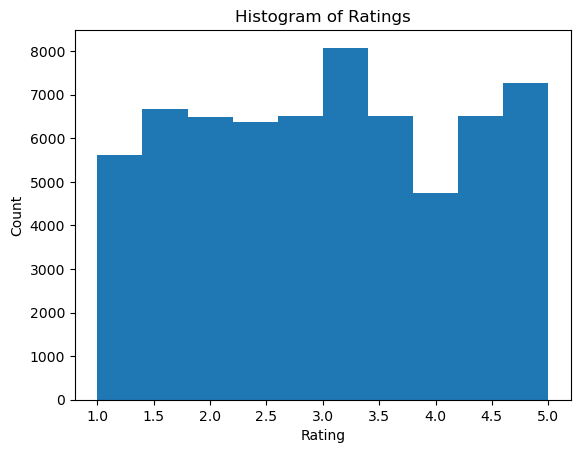

In [12]:
import matplotlib.pyplot as plt
# plot histogram of ratings
plt.hist(ratings_df['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.show()


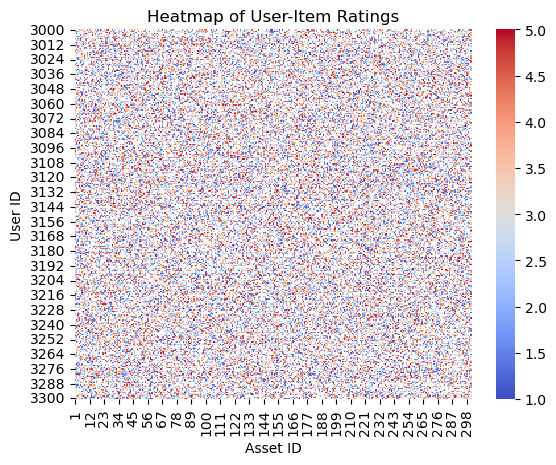

In [13]:
import seaborn as sns

# create pivot table of ratings
ratings = ratings_df.pivot_table(index='userId', columns='assetId', values='rating')

# plot heatmap of ratings
sns.heatmap(ratings, cmap='coolwarm')
plt.xlabel('Asset ID')
plt.ylabel('User ID')
plt.title('Heatmap of User-Item Ratings')
plt.show()


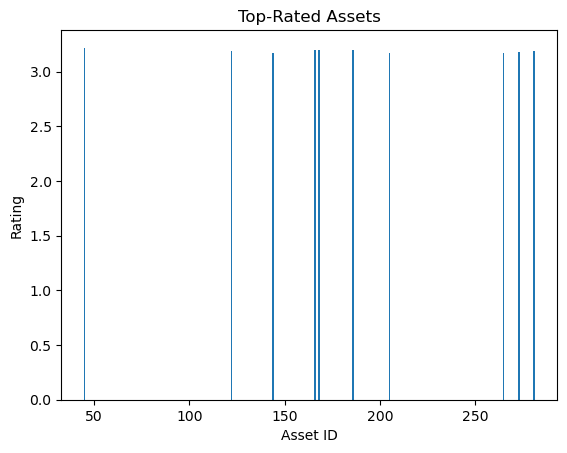

In [14]:
# group by assetId and calculate mean rating
ratings = ratings_df.groupby('assetId')['rating'].mean()

# sort by rating in descending order and select top 10
top_rated = ratings.sort_values(ascending=False)[:10]

# plot bar chart of top-rated assets
plt.bar(top_rated.index, top_rated.values)
plt.xlabel('Asset ID')
plt.ylabel('Rating')
plt.title('Top-Rated Assets')
plt.show()


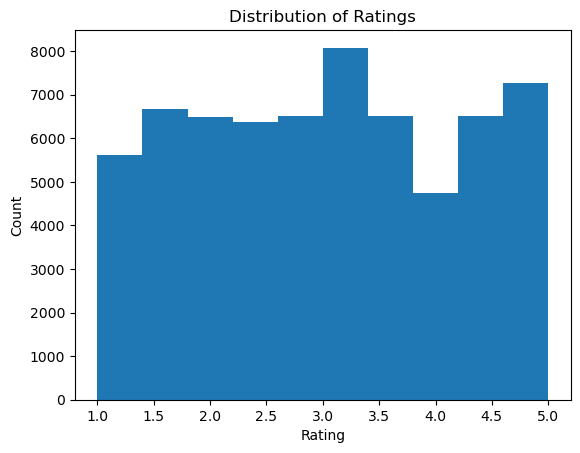

In [15]:
# Distribution of the ratings
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.hist(ratings_df['rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


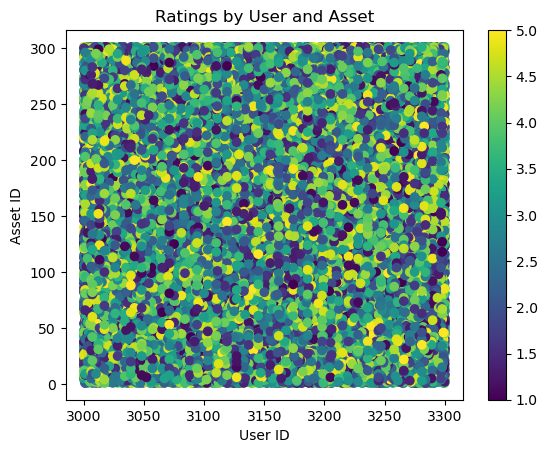

In [16]:
# plot scatter plot of ratings by user and asset
plt.scatter(ratings_df['userId'], ratings_df['assetId'], c=ratings_df['rating'])
plt.xlabel('User ID')
plt.ylabel('Asset ID')
plt.title('Ratings by User and Asset')
plt.colorbar()
plt.show()

### Splitting of the data into train and test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

In [19]:
print(train_df)

       projectId  userId  assetId  \
19235      10008    3300      296   
4740       10002    3073      232   
17498      10006    3187       40   
4961       10002    3141      256   
44281      10020    3237       62   
...          ...     ...      ...   
62570      10030    3089      192   
38158      10016    3037       15   
860        10001    3180       55   
15795      10006    3020       62   
56422      10025    3041       38   

                                               assetName  \
19235  The benefits of using a cloud-based project ma...   
4740   Comparing public, private, and hybrid cloud mo...   
17498  Cloud-Based Virtualization: A Comprehensive Guide   
4961      Harnessing the power of cloud-native databases   
44281                                  GCP for Beginners   
...                                                  ...   
62570  Cloud Computing for Non-Profits: Challenges an...   
38158    Building Secure and Reliable Cloud Applications   
860            

In [20]:
print(test_df)

       projectId  userId  assetId  \
15724      10006    3026       95   
14018      10005    3280      126   
33136      10013    3100       21   
23072      10009    3178      295   
54488      10023    3081      164   
...          ...     ...      ...   
48124      10021    3209      231   
60777      10027    3099      100   
7149       10003    3155      200   
39845      10016    3006       73   
8341       10003    3037       25   

                                               assetName  \
15724         Google Cloud Platform for Machine Learning   
14018                    Azure DevOps for CI/CD Pipeline   
33136                      Cloud-Native Machine Learning   
23072  The benefits of a cloud-based software develop...   
54488   Building real-time applications with AWS AppSync   
...                                                  ...   
48124  Cloud-Native DevOps: Accelerating Your Applica...   
60777                               Azure for Architects   
7149   Cloud Co

### **SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings.**

Detailed documentation can be found at https://github.com/UKPLab/sentence-transformers

and https://www.sbert.net/index.html

#### Setup SentenceTransformers

In [21]:
!pip install -U sentence-transformers --quiet

**all-MiniLM-L6-v2** is a sentence-transformers model: It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.

---

More details can be found at https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2 

In [22]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-MiniLM-L6-v2')

#### Cosine Similarity

In [23]:
emb1 = model.encode("Cost Optimization Strategies for Google Cloud Platform")
emb2 = model.encode("How to Monitor and Debug Applications on Google Cloud Platform")
cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.4753]])


In [24]:
emb3 = model.encode("Methods for saving cost in Google Cloud Platform")
cos_sim = util.cos_sim(emb1, emb3)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.8018]])


### Training through Various Alogrithms and Evaluation

In [25]:
!pip install surprise --quiet
from surprise import Dataset, Reader
from surprise.dataset import DatasetAutoFolds

from surprise import SVD, KNNBasic, NormalPredictor, BaselineOnly
from surprise.model_selection import cross_validate

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


In [26]:
reader = Reader(rating_scale=(1, 5))


In [27]:
file_path = '/content/project_user_asset_ratings.csv'

In [28]:
new_df = ratings_df[['userId', 'assetId', 'rating']] # select the desired columns
new_df.to_csv('new_ratings.csv', index=False, header=False) # save to a new CSV file without the index column


In [29]:
new_df.head()

,userId,assetId,rating
0,3012,126,2.6
1,3012,84,4.7
2,3012,237,2.8
3,3012,195,2.1
4,3012,139,2.0


In [30]:
#new_df = pd.read_csv('/content/new_ratings.csv')
new_df = pd.read_csv('new_ratings.csv')


In [31]:
new_df.head()

,3012,126,2.6
0,3012,84,4.7
1,3012,237,2.8
2,3012,195,2.1
3,3012,139,2.0
4,3012,286,3.2


In [32]:
reader = Reader(line_format='user item rating', sep=',', rating_scale=(1, 5))


In [33]:
data = Dataset.load_from_df(new_df, reader)


In [34]:
print(data.raw_ratings)

[(3012, 84, 4.7, None), (3012, 237, 2.8, None), (3012, 195, 2.1, None), (3012, 139, 2.0, None), (3012, 286, 3.2, None), (3012, 113, 2.1, None), (3012, 167, 3.3, None), (3012, 29, 4.6, None), (3012, 118, 2.6, None), (3012, 17, 1.9, None), (3012, 162, 5.0, None), (3012, 206, 3.0, None), (3012, 138, 1.4, None), (3012, 34, 1.2, None), (3012, 109, 1.4, None), (3012, 291, 3.5, None), (3012, 256, 4.2, None), (3140, 33, 2.7, None), (3140, 198, 2.8, None), (3140, 196, 4.8, None), (3140, 240, 4.5, None), (3140, 271, 2.1, None), (3140, 129, 3.0, None), (3140, 284, 1.7, None), (3140, 6, 4.7, None), (3140, 59, 4.5, None), (3140, 275, 2.2, None), (3140, 137, 3.6, None), (3140, 175, 3.4, None), (3140, 58, 1.6, None), (3140, 151, 4.1, None), (3125, 272, 1.5, None), (3125, 1, 2.9, None), (3125, 166, 3.2, None), (3125, 251, 2.1, None), (3125, 10, 4.5, None), (3125, 58, 2.7, None), (3125, 186, 1.8, None), (3125, 158, 3.2, None), (3125, 123, 3.9, None), (3125, 30, 1.8, None), (3125, 124, 2.2, None), (3125

#### Computing Perfomance Metrics

RMSE is calculated as the square root of the average squared difference between the predicted ratings and the actual ratings. A lower value of RMSE indicates better performance of the model in predicting the ratings.

MAE is calculated as the absolute difference between the predicted ratings and the actual ratings, averaged across all ratings. A lower value of MAE indicates better performance of the model in predicting the ratings.


In [35]:
# Define the algorithms to be used
algo_SVD = SVD()
algo_KNN = KNNBasic()
algo_Random = NormalPredictor()
algo_Baseline = BaselineOnly()

# Perform cross-validation
print("SVD:")
cross_validate(algo_SVD, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("\nKNN:")
cross_validate(algo_KNN, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("\nRandom:")
cross_validate(algo_Random, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("\nBaseline:")
cross_validate(algo_Baseline, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)



SVD:
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2153  1.2149  1.2230  1.2197  1.2121  1.2170  0.0039  
MAE (testset)     1.0369  1.0347  1.0450  1.0392  1.0318  1.0375  0.0045  
Fit time          0.56    0.49    0.50    0.47    0.48    0.50    0.03    
Test time         0.07    0.06    0.06    0.06    0.06    0.06    0.00    

KNN:
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1848  1.1718  1.1836  1.1829  1.1708  1.1

{'test_rmse': array([1.15844942, 1.15739265, 1.16284448, 1.16283558, 1.16292033]),
 'test_mae': array([1.00310973, 1.00067123, 1.00546046, 1.0051925 , 1.00437757]),
 'fit_time': (0.11188173294067383,
  0.14051485061645508,
  0.12810134887695312,
  0.1215670108795166,
  0.13733839988708496),
 'test_time': (0.03900647163391113,
  0.038512229919433594,
  0.04000139236450195,
  0.03798413276672363,
  0.33405208587646484)}

## Creating Embedding for the entire dataset

#### Creating Embedding for the entire dataset

In [36]:
sentences = catalog_df['assetDesc'].tolist()

In [37]:
embeddings = model.encode(sentences)

In [38]:
#compute cosine similarity between all the pairs of sentences in the catalog
cos_sim = util.cos_sim(embeddings, embeddings)

In [39]:
print(len(cos_sim))

311


In [40]:
print(cos_sim)

tensor([[1.0000, 0.5721, 0.4944,  ..., 0.2675, 0.2726, 0.2990],
        [0.5721, 1.0000, 0.5059,  ..., 0.3291, 0.3488, 0.3463],
        [0.4944, 0.5059, 1.0000,  ..., 0.2882, 0.3400, 0.3697],
        ...,
        [0.2675, 0.3291, 0.2882,  ..., 1.0000, 0.1765, 0.2705],
        [0.2726, 0.3488, 0.3400,  ..., 0.1765, 1.0000, 0.2094],
        [0.2990, 0.3463, 0.3697,  ..., 0.2705, 0.2094, 1.0000]])


In [41]:
print(cos_sim[10][20])


tensor(0.4067)


In [42]:
# Grouping the pairs and their similarity scores starting from the first entry
all_pair_combinations = []
for x in range(len(cos_sim)-1):
    for y in range(x+1, len(cos_sim)):
        # all_pair_combinations.append((cos_sim[x][y], x, y))
        all_pair_combinations.append((x, y, cos_sim[x][y].item()))

all_pair_combinations 

[(0, 1, 0.5721426606178284),
 (0, 2, 0.4943721294403076),
 (0, 3, 0.6330676674842834),
 (0, 4, 0.37094825506210327),
 (0, 5, 0.6833572387695312),
 (0, 6, 0.660858154296875),
 (0, 7, 0.6181886196136475),
 (0, 8, 0.8081952333450317),
 (0, 9, 0.6083675026893616),
 (0, 10, 0.4404478073120117),
 (0, 11, 0.3409588932991028),
 (0, 12, 0.5918256044387817),
 (0, 13, 0.46682125329971313),
 (0, 14, 0.562870442867279),
 (0, 15, 0.7637791037559509),
 (0, 16, 0.4054906964302063),
 (0, 17, 0.46019458770751953),
 (0, 18, 0.6019160747528076),
 (0, 19, 0.41072022914886475),
 (0, 20, 0.4764223098754883),
 (0, 21, 0.5924181342124939),
 (0, 22, 0.7347820997238159),
 (0, 23, 0.5203927159309387),
 (0, 24, 0.563748300075531),
 (0, 25, 0.46231913566589355),
 (0, 26, 0.6400744915008545),
 (0, 27, 0.5095697641372681),
 (0, 28, 0.5846669673919678),
 (0, 29, 0.5032654404640198),
 (0, 30, 0.5305436849594116),
 (0, 31, 0.42464369535446167),
 (0, 32, 0.6517331004142761),
 (0, 33, 0.38113343715667725),
 (0, 34, 0.4844

In [43]:
import csv

filename = 'explored_list.csv'

with open(filename, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for row in all_pair_combinations:
        writer.writerow(row)
        
print(f"The list has been saved to {filename}.")


The list has been saved to explored_list.csv.


In [44]:
print(len(all_pair_combinations))

48205


### Querying

In [45]:
!pip install colorama
import colorama
from colorama import Fore

Defaulting to user installation because normal site-packages is not writeable


In [46]:
def personalize(currentUserId):
  print("*************************************")
  print(Fore.RED+"Your employee number is", currentUserId)
  print("*************************************")
  print("")

  # print the list of assets that the user has rated with a value greater than 3.0
  filtered_assets = train_df.loc[(train_df['userId'] == currentUserId) & (train_df['rating'] > 3.0), 'assetId'].tolist()

  # sort the filtered_assets list in descending order and store it in a new list
  sorted_filtered_assets = sorted(filtered_assets, reverse=True)

  # take the top 7 assets from the sorted_filtered_assets list with unique values
  top_7_assets_unique = list(set(sorted_filtered_assets[0:7]))
  
  for item in top_7_assets_unique:
    get_top_assets(item,5)


  return 




In [47]:
def get_top_assets(x, top_n):

    asset_name = catalog_df.loc[catalog_df['assetId'] == x, 'assetName'].iloc[0]
    print(" ")
    print(Fore.BLUE+"You have rated the asset:", asset_name)
    print(Fore.GREEN+"RECOMMENDATIONS based on the asset:", asset_name)
    print("----------------------------------")

     # Filtering pair that have x as their first element
    filtered_pair = [t for t in all_pair_combinations if t[0] == x]

    # Sorting the filtered pairs by cosine similarity in descending order
    sorted_pair = sorted(filtered_pair, key=lambda t: t[2], reverse=True)
   
    # Select the top n tuples
    top_assets_id = sorted_pair[:top_n]

    for item in top_assets_id:
      asset_name = catalog_df.loc[catalog_df['assetId'] == item[1], 'assetName'].iloc[0]
      print(Fore.CYAN +">",item[1], asset_name)

    return 



In [48]:
personalize(3125)

*************************************
Your employee number is 3125
*************************************

 
You have rated the asset: Securing your AWS infrastructure with IAM
RECOMMENDATIONS based on the asset: Securing your AWS infrastructure with IAM
----------------------------------
> 293 Serverless Computing: Building Apps Without Servers
> 292 Serverless Computing: Building Applications Without Infrastructure
> 297 The future of cloud computing: Emerging trends and technologies
> 296 The benefits of using a cloud-based project management tool
> 304 The Role of Cloud Computing in DevOps
 
You have rated the asset: The Future of Cloud Computing: Emerging Trends to Watch
RECOMMENDATIONS based on the asset: The Future of Cloud Computing: Emerging Trends to Watch
----------------------------------
> 304 The Role of Cloud Computing in DevOps
> 302 The Pros and Cons of Cloud Computing for Education
> 299 The Future of Cloud Computing: Trends and Predictions
> 300 The Impact of Cloud Co

### Performance of the model

In [53]:
from sklearn.linear_model import LinearRegression

# create a feature matrix X and target vector y for training
X_train = train_df[['userId', 'assetId']]
y_train = train_df['rating']

# create a feature matrix X_test and target vector y_test for testing
X_test = test_df[['userId', 'assetId']]
y_test = test_df['rating']

# instantiate the linear regression model and fit to the training data
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = reg_model.predict(X_test)

# evaluate the model performance using RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: ", rmse)
print("MAE: ", mae)


RMSE:  1.1550702128896793
MAE:  1.001314077834355


### Dealing with Cold Start

In [49]:
# Grouping the ratings by asset id, and calculating the average rating
average_ratings = ratings_df.groupby('assetId')['rating'].mean()


In [50]:
# Sorting the assets - to get the top ones - by their average rating in descending order
sorted_assets = average_ratings.sort_values(ascending=False)

In [51]:
# Getting the top 15 assets with the highest average rating
top_assets = sorted_assets.head(15)

In [52]:
# print the name of the assets with the highest average rating
for item in top_assets.index:
  asset_name = catalog_df.loc[catalog_df['assetId'] == item, 'assetName'].iloc[0]
  print(Fore.GREEN+"The asset:", asset_name, "has an average rating of:", top_assets[item])
  print("")

The asset: Designing Cloud-Native Applications has an average rating of: 3.2182648401826484

The asset: Cloud AI: Harnessing the Power of Artificial Intelligence in the Cloud has an average rating of: 3.2

The asset: Building Serverless Applications on Azure has an average rating of: 3.1974874371859294

The asset: Cloud Computing for Education: Enabling Digital Learning has an average rating of: 3.194827586206897

The asset: Azure Cosmos DB for NoSQL Data has an average rating of: 3.1898477157360405

The asset: Leveraging cloud technology for agile software development has an average rating of: 3.1879227053140093

The asset: Introduction to Azure Logic Apps has an average rating of: 3.179365079365079

The asset: Implementing Disaster Recovery on Azure has an average rating of: 3.1734513274336287

The asset: Cloud Migration Strategies for Enterprises has an average rating of: 3.171144278606965

The asset: Azure Storage has an average rating of: 3.1693333333333333

The asset: Cloud Compu